First 5 rows of the dataset:
   Size(in sq)  Location  NumRooms          Price
0       2947.6     Rural         6  211683.146917
1       2788.2     Urban         5  689951.049912
2        681.8     Rural         2  608125.910075
3       3092.4     Rural         7  255773.531659
4       2984.3  Suburban         7  698248.040726

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size(in sq)  1000 non-null   float64
 1   Location     1000 non-null   object 
 2   NumRooms     1000 non-null   int64  
 3   Price        1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB
None

Missing values in each column:
Size(in sq)    0
Location       0
NumRooms       0
Price          0
dtype: int64

Summary statistics:
       Size(in sq)    NumRooms          Price
count  1000.000000  1000.00000    1000.00000

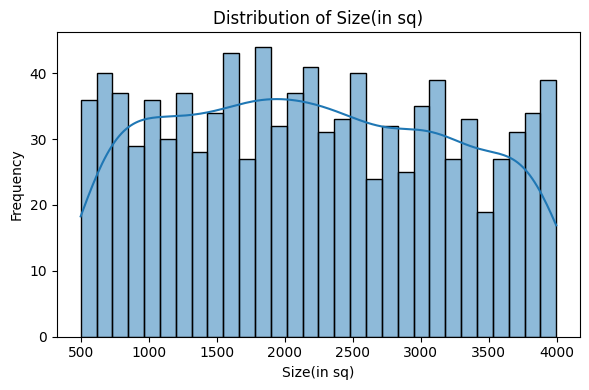

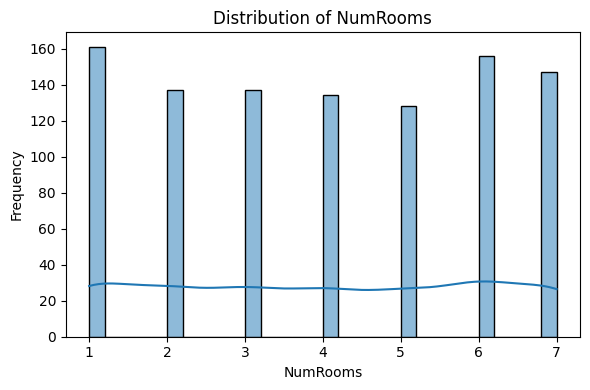

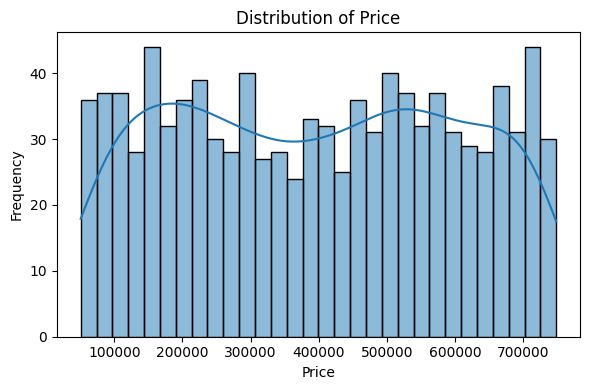

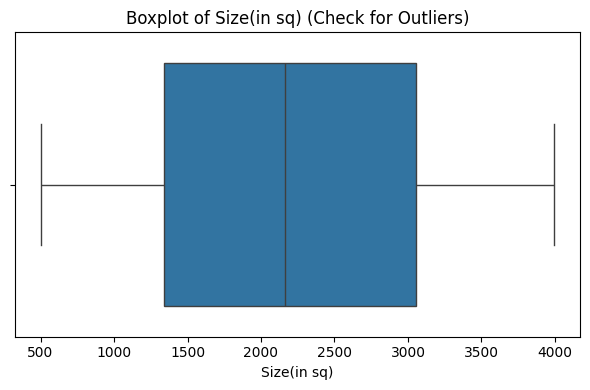

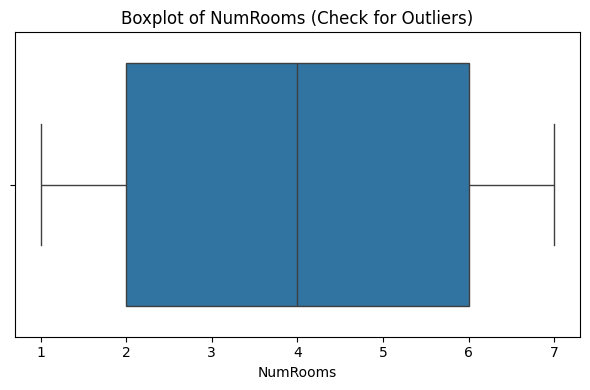

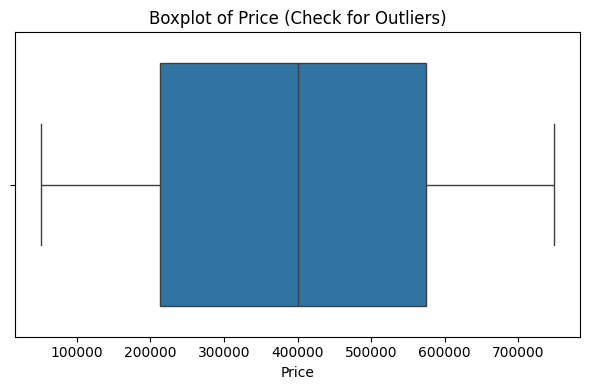


Processed dataset preview:
   Size(in sq)  NumRooms          Price  Location_Suburban  Location_Urban
0     0.700197  0.833333  211683.146917              False           False
1     0.654593  0.666667  689951.049912              False            True
2     0.051955  0.166667  608125.910075              False           False
3     0.741624  1.000000  255773.531659              False           False
4     0.710697  1.000000  698248.040726               True           False

Correlation of all features with 'Price':
Price                1.000000
NumRooms             0.021201
Size(in sq)          0.013350
Location_Urban      -0.006381
Location_Suburban   -0.009584
Name: Price, dtype: float64


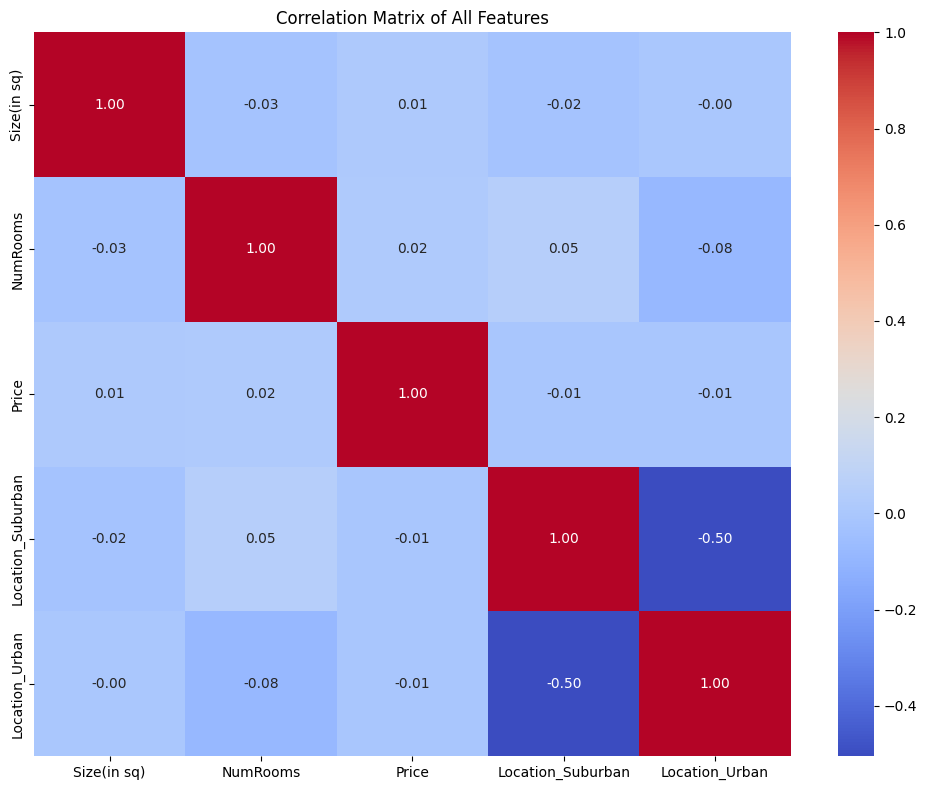

NameError: name 'np' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('house_prices.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Dataset info
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Distribution plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Box plots to identify potential outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Check for Outliers)')
    plt.tight_layout()
    plt.show()

# Select features to scale
numerical_features = ['Size(in sq)', 'NumRooms']

# Apply Min-Max Scaling (scales values between 0 and 1)
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# One-Hot Encode 'Location' (non-ordinal category)
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Show first few rows of the processed dataset
print("\nProcessed dataset preview:")
print(df.head())

# Save the processed dataset
df.to_csv("processed_house_price_data.csv", index=False)

# ----- Correlation Analysis -----
# Compute correlation matrix
correlation_matrix = df.corr()

# Show correlation with target variable 'Price'
price_corr = correlation_matrix['Price'].sort_values(ascending=False)
print("\nCorrelation of all features with 'Price':")
print(price_corr)

# Visualize full correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

# ----- Model Training -----
# Separate features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print("\nModel Evaluation:")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R² Score:", r2)
